In [1]:
%cd ../
%matplotlib inline

/home/eli/AnacondaProjects/HTFATorch


In [2]:
import logging
import numpy as np
import re

import htfa_torch.dtfa as DTFA
import htfa_torch.niidb as niidb
import htfa_torch.utils as utils

In [3]:
logging.basicConfig(format='%(asctime)s %(message)s', datefmt='%m/%d/%Y %H:%M:%S',
                    level=logging.INFO)

In [4]:
lepping_db = niidb.FMriActivationsDb('data/sound_depression.db', mask='/data/eli/sound_depression/ds000171-download/all_tasks/wholebrain.nii.gz')

In [5]:
dtfa = DTFA.DeepTFA(lepping_db.all(), mask='/data/eli/sound_depression/ds000171-download/all_tasks/wholebrain.nii.gz', num_factors=100, embedding_dim=2)

01/19/2019 10:57:09 Loading Nifti image /data/eli/sound_depression/fmriprep/sub-mdd16/func/sub-mdd16_task-nonmusic_run-2_bold_space-MNI152NLin2009cAsym_preproc.nii.gz with mask /data/eli/sound_depression/ds000171-download/all_tasks/wholebrain.nii.gz (zscore=True, smooth=6)
01/19/2019 10:57:13 Loading Nifti image /data/eli/sound_depression/fmriprep/sub-mdd16/func/sub-mdd16_task-music_run-4_bold_space-MNI152NLin2009cAsym_preproc.nii.gz with mask /data/eli/sound_depression/ds000171-download/all_tasks/wholebrain.nii.gz (zscore=True, smooth=6)
01/19/2019 10:57:16 Loading Nifti image /data/eli/sound_depression/fmriprep/sub-mdd16/func/sub-mdd16_task-nonmusic_run-1_bold_space-MNI152NLin2009cAsym_preproc.nii.gz with mask /data/eli/sound_depression/ds000171-download/all_tasks/wholebrain.nii.gz (zscore=True, smooth=6)
01/19/2019 10:57:19 Loading Nifti image /data/eli/sound_depression/fmriprep/sub-mdd16/func/sub-mdd16_task-music_run-5_bold_space-MNI152NLin2009cAsym_preproc.nii.gz with mask /data/e

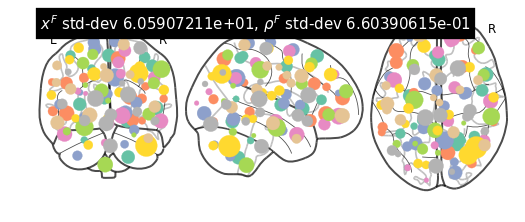

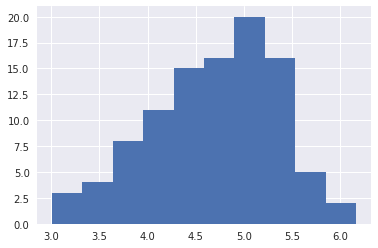

(<nilearn.plotting.displays.OrthoProjector at 0x7f65c2a61780>,
 tensor([[-3.2618e+01, -8.3145e+01, -1.1434e+01],
         [ 5.0513e+01,  1.4900e+01,  1.5631e+00],
         [-3.9664e+00,  3.5133e+01,  1.0850e+01],
         [-1.7675e+01, -3.3537e+01,  4.2947e+01],
         [ 2.0881e+01, -5.2391e+01, -4.9986e+01],
         [ 3.8207e+01, -5.0406e+01,  5.4768e+01],
         [-2.5279e+01, -3.9472e+01, -3.2006e+01],
         [ 5.7982e-01,  3.0622e+01,  5.6957e+01],
         [-3.0104e+01, -7.4532e+00,  5.5682e+00],
         [ 2.6064e+01, -5.4732e+01,  1.1773e+01],
         [ 2.0033e+01, -5.8659e+01, -1.1998e+01],
         [ 4.6305e+01, -1.7889e+00,  4.6095e+01],
         [-3.9720e+01, -4.7243e+01,  5.6930e+01],
         [ 1.0324e+01, -6.7464e+01,  5.3766e+01],
         [-2.5557e+01, -4.5825e+00,  3.3331e+01],
         [-4.3879e+01,  3.9788e+01, -3.8826e+00],
         [ 2.2757e+01,  5.7244e+01,  1.2879e+01],
         [ 3.5290e+01, -7.8482e+01,  1.1473e+01],
         [ 3.9066e+01,  4.0403e+01,  

In [6]:
dtfa.visualize_factor_embedding()

In [7]:
losses = dtfa.train(num_steps=1000, learning_rate=1e-2, log_level=logging.INFO, num_particles=1,
                    batch_size=50, use_cuda=True, checkpoint_steps=100, blocks_batch_size=10, patience=100)

01/19/2019 11:09:10 [Epoch 1] (53548ms) Posterior free-energy 1.39901018e+09 = KL from prior 4.58195752e+03 - log-likelihood -1.39900557e+09
01/19/2019 11:09:10 Saving checkpoint...
01/19/2019 11:10:04 [Epoch 2] (54718ms) Posterior free-energy 1.32054182e+09 = KL from prior 9.25411328e+03 - log-likelihood -1.32053248e+09
01/19/2019 11:10:58 [Epoch 3] (53429ms) Posterior free-energy 1.26575334e+09 = KL from prior 1.78394355e+04 - log-likelihood -1.26573530e+09
01/19/2019 11:11:51 [Epoch 4] (53347ms) Posterior free-energy 1.22951642e+09 = KL from prior 2.75357246e+04 - log-likelihood -1.22948838e+09
01/19/2019 11:12:44 [Epoch 5] (52940ms) Posterior free-energy 1.20697613e+09 = KL from prior 3.80985156e+04 - log-likelihood -1.20693850e+09
01/19/2019 11:13:38 [Epoch 6] (53522ms) Posterior free-energy 1.19069990e+09 = KL from prior 4.94308672e+04 - log-likelihood -1.19064998e+09
01/19/2019 11:14:31 [Epoch 7] (52893ms) Posterior free-energy 1.17865011e+09 = KL from prior 6.07905469e+04 - log

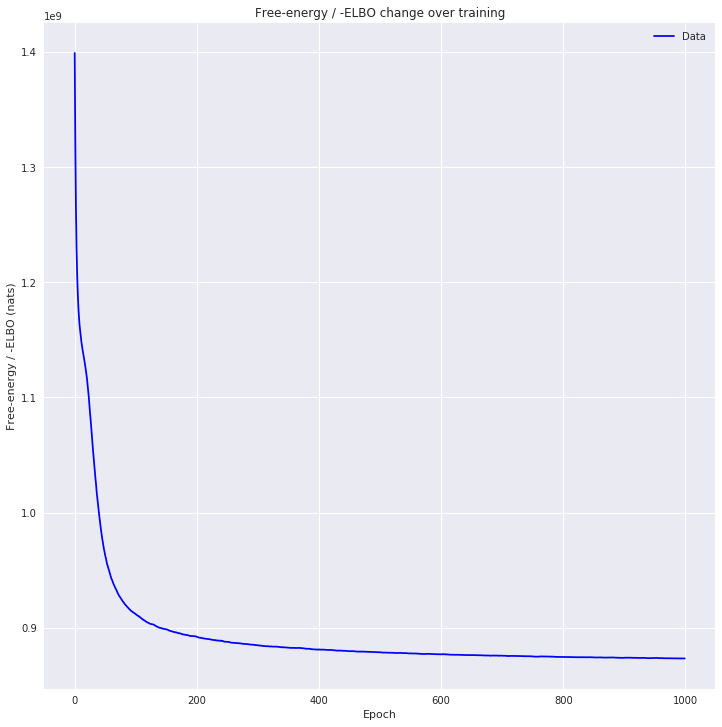

In [8]:
utils.plot_losses(losses)

In [9]:
def subject_labeler(block):
    subject_regex = re.compile("([A-Za-z]+)([0-9]{1,2})")
    m = subject_regex.search(block.subject)
    condition, sub_num = m.groups()
    if condition == 'mdd':
        condition = 'Major Depressive'
    elif condition == 'control':
        condition = 'Control'
    return '%s Participant %d' % (condition, int(sub_num))

In [10]:
def task_labeler(block):
    if block.task == 'negative_music':
        task = 'Negative music'
    elif block.task == 'positive_music':
        task = 'Positive music'
    else:
        task = block.task.capitalize()
    return task

In [11]:
def lepping_2017_labeler(block):
    subject = subject_labeler(block)
    task = task_labeler(block)
    return subject + ', ' + task + ' stimulus'

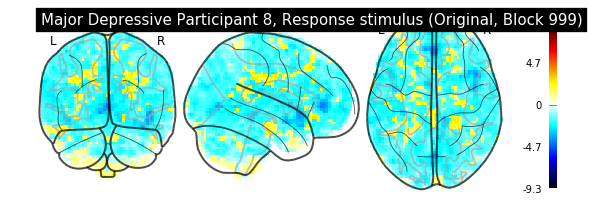

01/20/2019 01:47:02 Reconstruction Error (Frobenius Norm): 1.86404526e+02 out of 2.45309341e+02


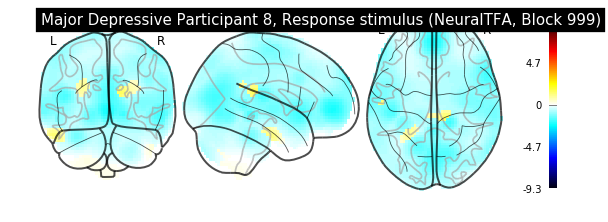

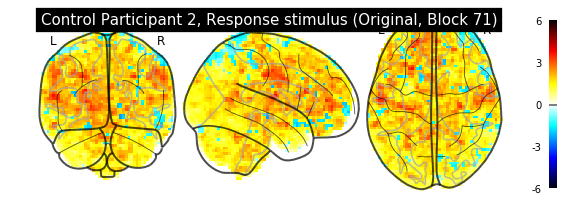

01/20/2019 01:47:05 Reconstruction Error (Frobenius Norm): 1.79891891e+02 out of 2.44230789e+02


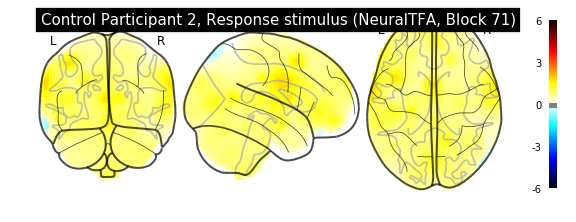

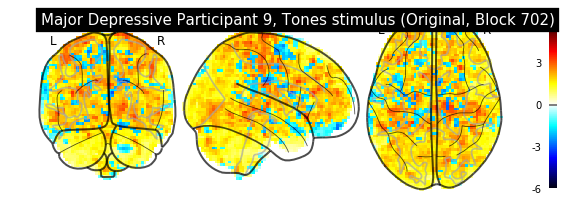

01/20/2019 01:47:09 Reconstruction Error (Frobenius Norm): 5.97790283e+02 out of 7.51073120e+02


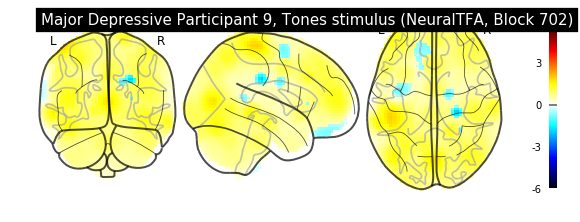

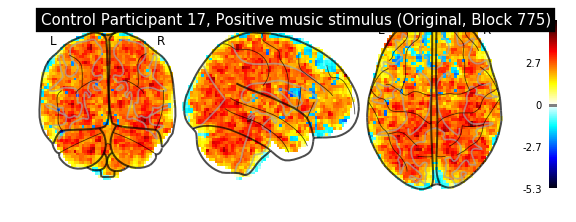

01/20/2019 01:47:14 Reconstruction Error (Frobenius Norm): 7.32863159e+02 out of 8.84880615e+02


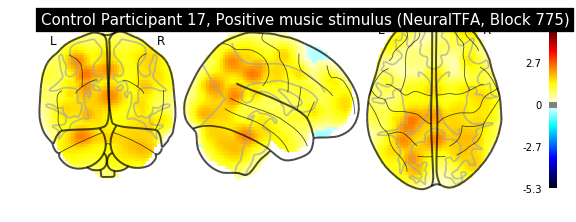

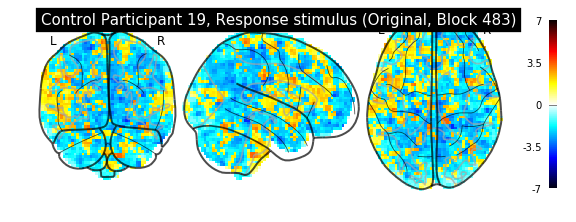

01/20/2019 01:47:18 Reconstruction Error (Frobenius Norm): 2.39764191e+02 out of 2.70797974e+02


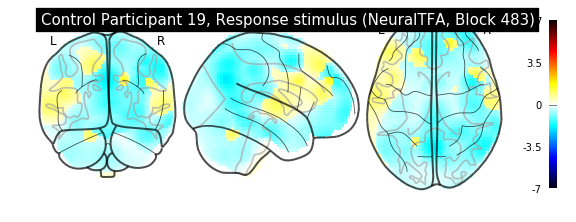

In [12]:
for b in np.random.choice(range(dtfa.num_blocks), 5):
    dtfa.plot_original_brain(b, labeler=lepping_2017_labeler)
    dtfa.plot_reconstruction(b, labeler=lepping_2017_labeler)

/home/eli/anaconda3/envs/HTFATorch/lib/python3.6/site-packages/matplotlib/figure.py:418: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


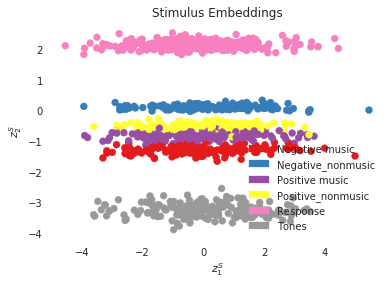

In [13]:
dtfa.scatter_task_embedding(labeler=task_labeler, figsize=None)

/home/eli/anaconda3/envs/HTFATorch/lib/python3.6/site-packages/matplotlib/figure.py:418: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


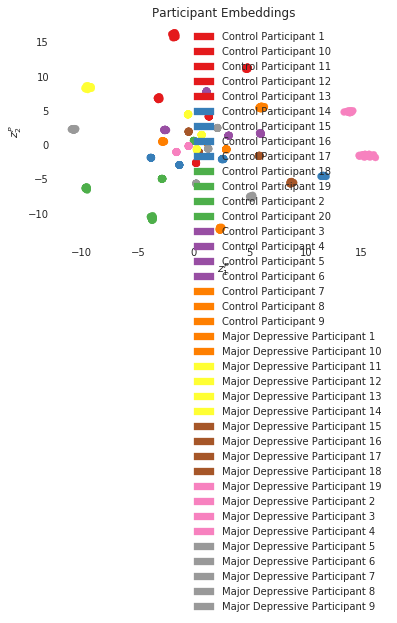

In [14]:
dtfa.scatter_subject_embedding(labeler=subject_labeler, figsize=None)

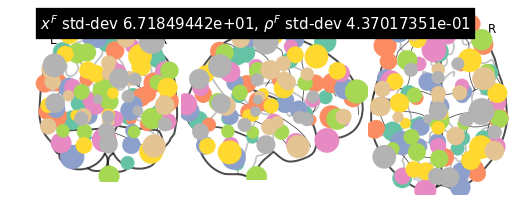

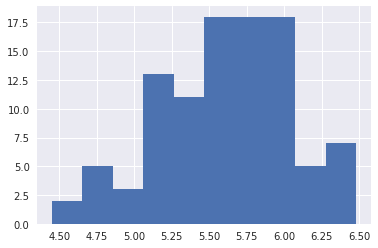

(<nilearn.plotting.displays.OrthoProjector at 0x7f65a5908d30>,
 tensor([[-3.7794e+01, -9.4369e+01, -1.1234e+01],
         [ 5.3988e+01,  1.6526e+01, -3.7441e+00],
         [-2.5037e-01,  3.9407e+01,  1.3599e+01],
         [-1.9437e+01, -3.4488e+01,  4.1443e+01],
         [ 2.0251e+01, -5.3508e+01, -5.6139e+01],
         [ 4.8305e+01, -5.3590e+01,  5.6957e+01],
         [-2.4182e+01, -3.7696e+01, -2.8889e+01],
         [-5.7342e-01,  3.8992e+01,  7.2067e+01],
         [-3.0932e+01, -4.8126e+00,  6.3476e+00],
         [ 2.6069e+01, -5.2197e+01,  1.5083e+01],
         [ 2.0475e+01, -6.3072e+01, -8.6293e+00],
         [ 5.1528e+01,  1.7847e+00,  5.2534e+01],
         [-4.7929e+01, -4.5085e+01,  6.0438e+01],
         [ 7.0905e+00, -7.2335e+01,  6.2108e+01],
         [-2.2884e+01, -9.8038e+00,  3.1776e+01],
         [-5.5706e+01,  4.5269e+01, -7.0796e+00],
         [ 3.4600e+01,  6.8141e+01,  1.2930e+01],
         [ 4.1342e+01, -8.9162e+01,  1.6708e+01],
         [ 4.7588e+01,  4.6067e+01,  

In [15]:
dtfa.visualize_factor_embedding()

In [16]:
dtfa.average_reconstruction_error()

01/20/2019 01:52:04 Average reconstruction error (MSE): 6.74021700e-01
01/20/2019 01:52:04 Average data norm (Euclidean): 9.63051352e-01
01/20/2019 01:52:04 Percent average reconstruction error: 0.273772


(0.6740217000240069, 0.9630513515838449, 0.0027377197375173124)

In [17]:
def condition_labeler(block):
    subject_regex = re.compile("([A-Za-z]+)([0-9]{1,2})")
    m = subject_regex.search(block.subject)
    condition, sub_num = m.groups()
    if condition == 'mdd':
        return 'Major Depressive'
    elif condition == 'control':
        return 'Control'
    return condition

/home/eli/anaconda3/envs/HTFATorch/lib/python3.6/site-packages/matplotlib/figure.py:418: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


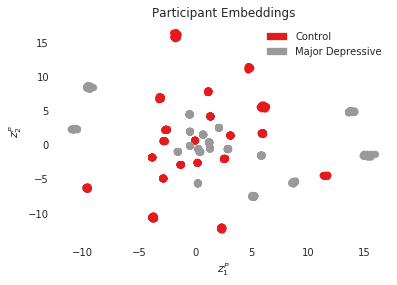

In [18]:
dtfa.scatter_subject_embedding(labeler=condition_labeler, figsize=None)